In [1]:
%matplotlib inline

# Spirulina analysis

## Setup the case study

In [2]:
from pyglotaran_extras import setup_case_study

In [3]:
results_folder, script_folder = setup_case_study(
    results_folder_root=".", output_folder_name="results"
)

Setting up case study for folder: /home/dafuq/git/pyglotaran-examples/spirulina
Results will be saved in: /home/dafuq/git/pyglotaran-examples/spirulina/results/spirulina


## Inspect data

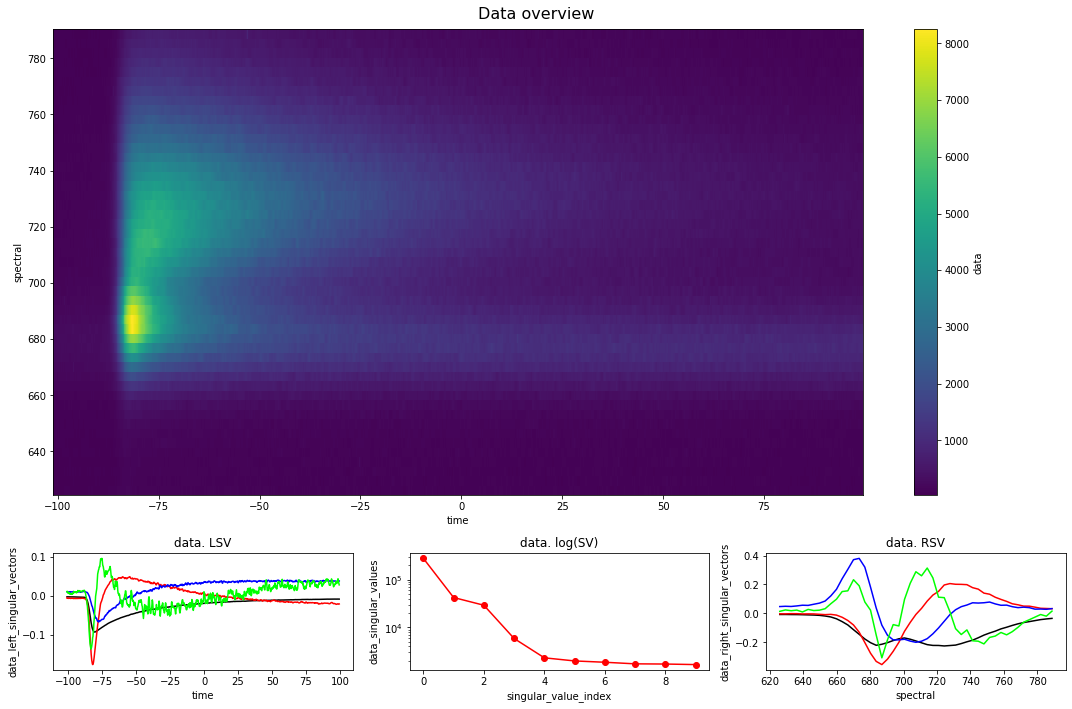

In [21]:
from glotaran.io import load_dataset
from pyglotaran_extras import plot_data_overview

spirolina_data = load_dataset(script_folder / "data/data.ascii")

fig_data, axes_data = plot_data_overview(spirolina_data, figsize=(15, 10))
axes_data[1].legend_.remove()
axes_data[3].legend_.remove()

## Basic analysis
As as first assumption we try a sequential model.

![Spirulina sequential scheme](../assets/spirulina_sequential.svg)

### Load model and parameter file

In [5]:
from glotaran.io import load_model, load_parameters

model = load_model(script_folder / "models/model.yaml")
parameters = load_parameters(script_folder / "models/parameters.yaml")

### Combine Model, Parameters and Data in a Scheme

In [20]:
from glotaran.project.scheme import Scheme

scheme = Scheme(
    model,
    parameters,
    {"spirolina_data": spirolina_data},
)
scheme.validate()

'Your model is valid.'

### Optimize the Scheme

In [7]:
from glotaran.analysis.optimize import optimize

result = optimize(scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.4944e+08                                    4.66e+08    
       1              2         5.1886e+07      1.98e+08       8.12e-01       4.65e+07    
       2              3         4.3892e+07      7.99e+06       4.34e-01       6.08e+06    
       3              4         4.3750e+07      1.42e+05       5.73e-02       2.24e+05    
       4              5         4.3750e+07      5.44e+02       4.52e-03       2.46e+04    
       5              6         4.3750e+07      9.30e+00       6.60e-04       3.07e+03    
The maximum number of function evaluations is exceeded.
Function evaluations 6, initial cost 2.4944e+08, final cost 4.3750e+07, first-order optimality 3.07e+03.


## Visualize and evaluate results

### Fit quality

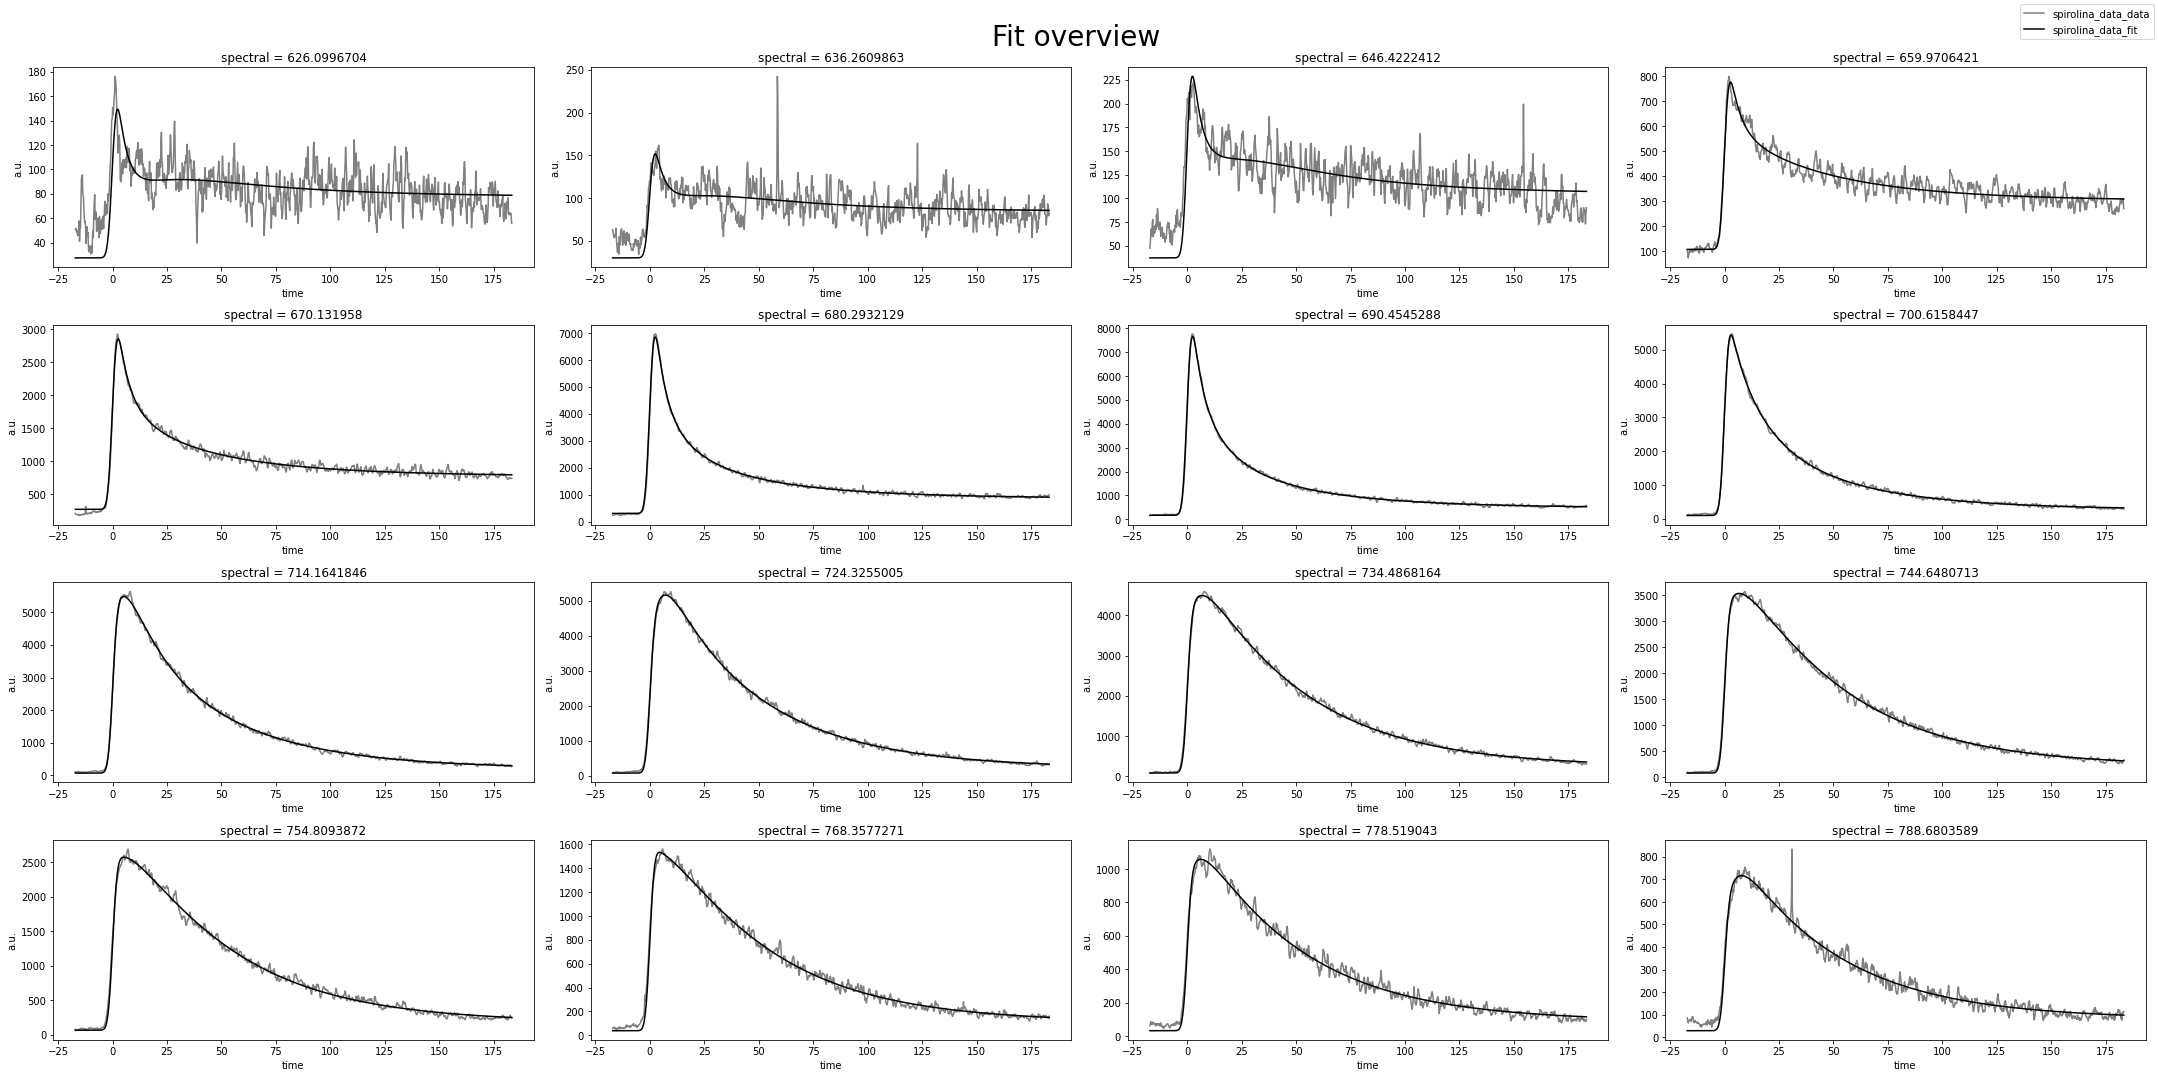

In [8]:
from pyglotaran_extras import plot_fitted_traces, select_plot_wavelengths

wavelengths = select_plot_wavelengths(result)
fig_traces, axes_traces = plot_fitted_traces(result, wavelengths)

### Physical meaning

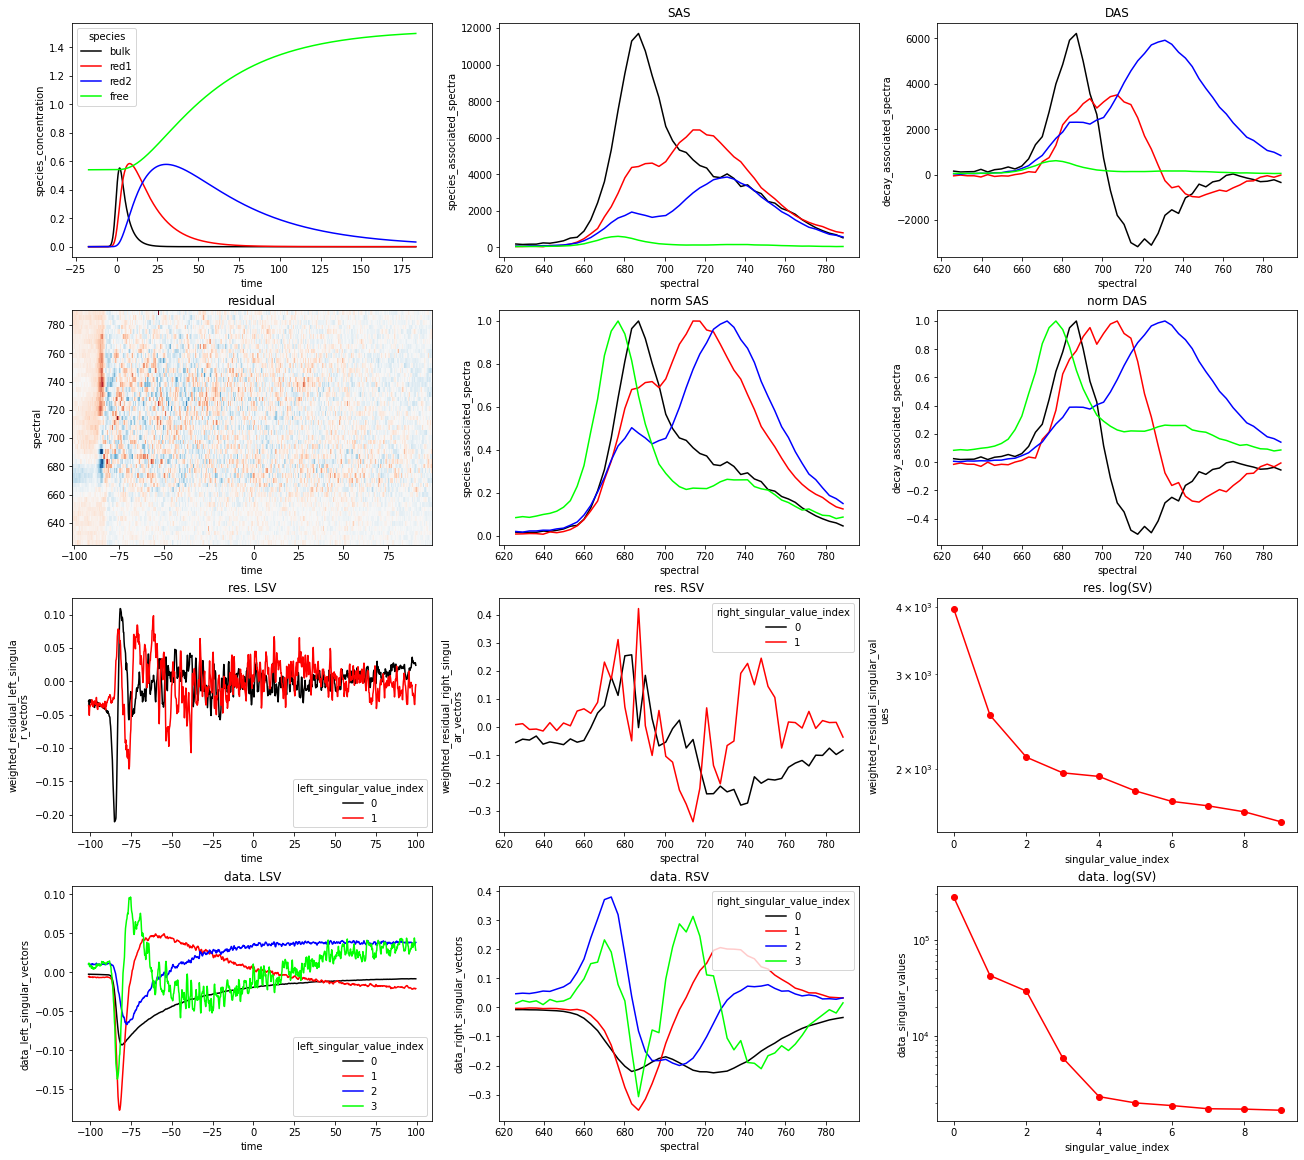

In [9]:
from pyglotaran_extras import plot_overview

fig_ov, axes_ov = plot_overview(result, figure_only=False, linlog=False)

## Save the results

In [18]:
from glotaran.io import save_result

save_result(result, results_folder / "global")

fig_data.savefig(results_folder / "global/data_plot.pdf")
fig_traces.savefig(results_folder / "global/traces_plot.pdf")
fig_ov.savefig(results_folder / "global/overview_plot.pdf")